In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [2]:
data = pd.read_csv("/home/darnesh/Documents/programming/Machine Learning/processed.cleveland.data",header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
data.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
data.hd.unique()

array([0, 2, 1, 3, 4])

In [5]:
data.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [6]:
def uniq(rows):
    #print(rows)
    return rows.unique()
data.iloc[:,1::].apply(uniq,axis=0)

sex                                               [1.0, 0.0]
cp                                      [1.0, 4.0, 3.0, 2.0]
restbp     [145.0, 160.0, 120.0, 130.0, 140.0, 172.0, 150...
chol       [233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268...
fbs                                               [1.0, 0.0]
restecg                                      [2.0, 0.0, 1.0]
thalach    [150.0, 108.0, 129.0, 187.0, 172.0, 178.0, 160...
exang                                             [0.0, 1.0]
oldpeak    [2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 3.1, ...
slope                                        [3.0, 2.0, 1.0]
ca                                   [0.0, 3.0, 2.0, 1.0, ?]
thal                                      [6.0, 3.0, 7.0, ?]
hd                                           [0, 2, 1, 3, 4]
dtype: object

In [7]:
data.ca.unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
len(data[data['ca']=='?'])

4

In [9]:
len(data[data['thal']=='?'])

2

In [10]:
data.shape

(303, 14)

In [11]:
data.loc[(data['ca']=='?') | (data.thal=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
data = data.loc[(data.ca!='?') & (data.thal!='?')]
data.shape

(297, 14)

In [13]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

<html>
<pre align=left>
<b>age</b> float
<b>sex</b>
    0 - female
    1 - male
<b>cp</b> chest pain
    1 - typical angina
    2 = atypical angina
    3 - non-anginal pain
    4 - asympotomatic
<b>restbp</b> resting BP
<b>chol</b> serum sholesterol
<b>fbs</b> fasting blood sugar
    0 - >-120 mg/dl
    1 - less than 120 mg/dl
<b>restecg</b> rest ECG
    1 - normal
    2 - having ST-T wave abnormality
    3 - showing probable or defnite left ventricular hypertrophy
<b>thalach</b> maximum heart rate achieved float
<b>exang</b> exercise induced angina 
    0 - no
    1 - yes
<b>oldpeak</b> ST depression induced by exercise relative to rest
<b>slope</b> the slope of the peak exercise ST segment
    1 - upsloping
    2 - flat
    3 - downsampling
<b>ca</b> number of major vessels(0-3) colored by fluoroscopy 
<b>thal</b> thalium heart scan
    3 - bormal(no cold spots)
    6 - fixed defect (cold spots during rest and exercise)
    7 - revesible defect (when cold spots only qppear during exercise
</pre>

In [14]:
pd.get_dummies(data, columns=['cp'], drop_first=True)

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,0,0,1
298,45.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,0,0,0
299,68.0,1.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,0,0,1
300,57.0,1.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,0,0,1


In [15]:
x = pd.get_dummies(x, columns = ['cp','restecg','slope','thal'], drop_first=True)
x.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,1,0,0,0,1,0,0,0,0


In [16]:
y[y>0] = 1
y

/tmp/ipykernel_29735/2972003604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y>0] = 1


0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: hd, Length: 297, dtype: int64

In [17]:
y.unique()

array([0, 1])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model = model.fit(x_train,y_train)

[Text(0.5979872881355932, 0.9545454545454546, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = yes_HD'),
 Text(0.3866525423728814, 0.8636363636363636, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = yes_HD'),
 Text(0.2521186440677966, 0.7727272727272727, 'oldpeak <= 2.7\ngini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = yes_HD'),
 Text(0.1483050847457627, 0.6818181818181818, 'age <= 57.5\ngini = 0.192\nsamples = 93\nvalue = [83, 10]\nclass = yes_HD'),
 Text(0.06779661016949153, 0.5909090909090909, 'thalach <= 125.5\ngini = 0.062\nsamples = 62\nvalue = [60, 2]\nclass = yes_HD'),
 Text(0.03389830508474576, 0.5, 'thalach <= 123.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = yes_HD'),
 Text(0.01694915254237288, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes_HD'),
 Text(0.05084745762711865, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no_HD'),
 Text(0.1016949152542373, 0.5, 'restbp <= 

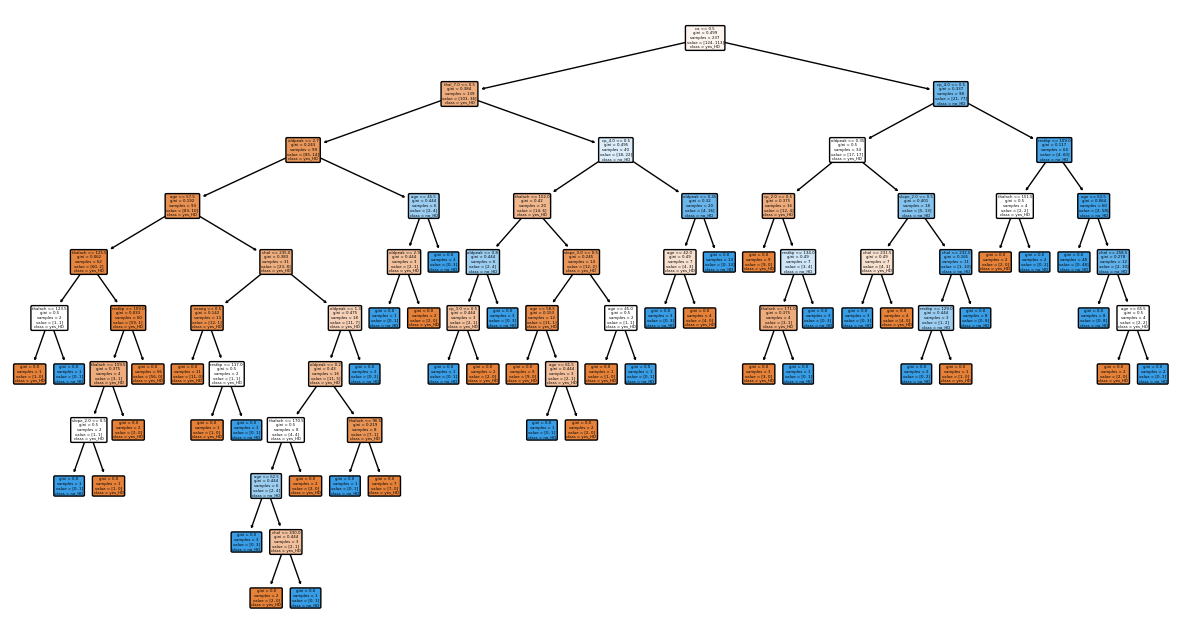

In [19]:
plt.figure(figsize=(15,8))
plot_tree(model,filled=True,rounded=True,feature_names=x.columns, class_names=['yes_HD','no_HD'])

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


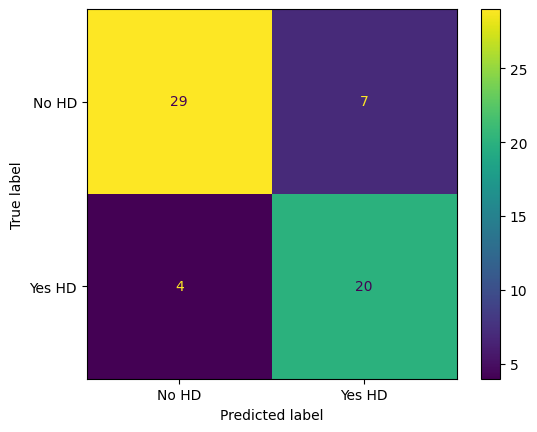

In [20]:
plot_confusion_matrix(model, x_test, y_test, display_labels=['No HD','Yes HD'])

In [22]:
path = model.cost_complexity_pruning_path(x_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00276606, 0.00361664, 0.00383583, 0.00389484,
        0.00401751, 0.00543835, 0.00562588, 0.00562588, 0.00562588,
        0.0060654 , 0.00632911, 0.00664518, 0.00766526, 0.00813743,
        0.00889252, 0.00972473, 0.01084991, 0.01140093, 0.01350211,
        0.01487036, 0.01593999, 0.02109705, 0.03586498, 0.0401355 ,
        0.13456628]),
 'impurities': array([0.        , 0.00829817, 0.02276472, 0.03043637, 0.03822605,
        0.04626108, 0.06257612, 0.07945376, 0.09070552, 0.10195728,
        0.11408808, 0.12041719, 0.13370755, 0.14903807, 0.1571755 ,
        0.16606802, 0.17579275, 0.18664266, 0.20944452, 0.23644874,
        0.2513191 , 0.26725909, 0.28835614, 0.32422111, 0.36435662,
        0.49892289])}

"ccp_alphas" is an array of alpha values and "impurities" is an array of the corresponding impurities of the decision trees obtained by using those alpha values.

In [46]:
ccp_alphas = path.ccp_alphas[:-1]
models = []
for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(x_train,y_train)
    models.append(model)

#we are removing the maximum alpha value as it prune all leaves leaving the root node

In [47]:
train_scores = [model.score(x_train,y_train) for model in models]
test_scores = [model.score(x_test,y_test) for model in models]

The model.score() method takes two arguments: X_test and y_test, which are the input features and corresponding true labels of the test data, respectively. The method then predicts the class labels of the test data using the trained decision tree classifier model, and compares these predicted labels with the true labels y_test to compute the accuracy of the model.

The accuracy is defined as the number of correctly classified instances divided by the total number of instances in the test data. The model.score() method returns the mean accuracy over all the test samples.

In summary, model.score() method provides an easy way to evaluate the performance of a trained decision tree classifier on unseen data by computing its accuracy, which is a commonly used metric for classification tasks.

<Figure size 2500x500 with 0 Axes>

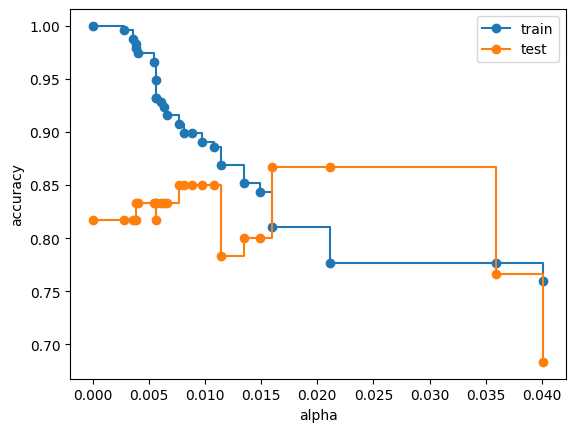

In [48]:
plt.figure(figsize=(25,5))
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel('accuracy')
ax.plot(ccp_alphas,train_scores, '-o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,'-o',label='test',drawstyle='steps-post')
plt.legend()

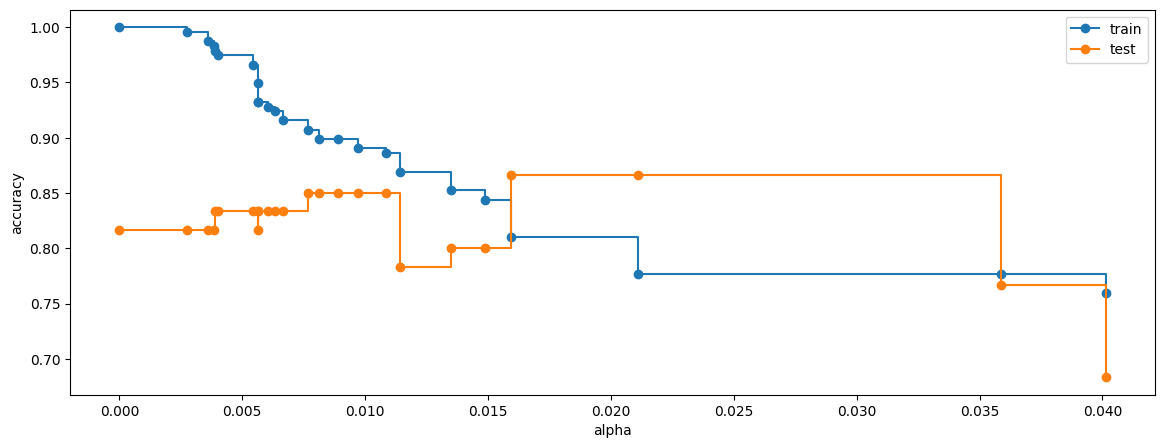

In [49]:
plt.figure(figsize=(14,5))
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.plot(ccp_alphas,train_scores,'-o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_scores,'-o',label='test', drawstyle='steps-post')
plt.legend()

In [50]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(model, x_train, y_train, cv=5)
scores

array([0.72916667, 0.75      , 0.76595745, 0.68085106, 0.74468085])

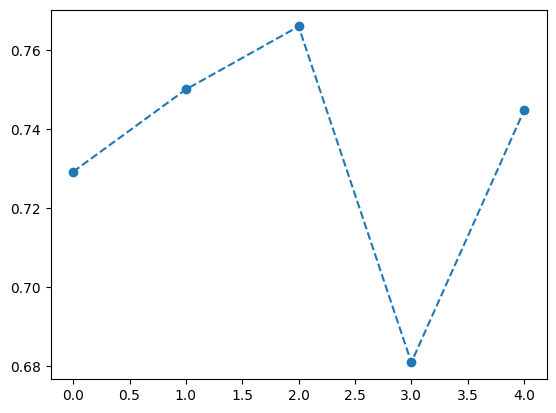

In [51]:
plt.plot(range(5), scores, '--o')

the graph shows that the accuracy for different training and testing data with same alpha value is different, suggesting that the alpha is sensitive to different datasets. So insted of picking single traing and testing dataset lets use CV to find the optimal ccp_alpha

In [52]:
ccp_alpha_values = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(model, x_train, y_train, cv=5)
    ccp_alpha_values.append([alpha, np.mean(scores), np.std(scores)])

In pandas.plot(), yerr is an optional parameter that can be used to specify the error bars for each data point in a line plot, bar plot, or similar visualization.

If specified, yerr should be a scalar, list, tuple, or array-like object with the same length as the data being plotted. Each value in yerr corresponds to the error bar for the corresponding data point in the plot. The error bars are visualized as a line or shaded region above and/or below each data point, indicating the range of uncertainty or variability in the data.

For example, if you are plotting a line chart with a time series of data points and want to show the standard deviation of the data at each time point, you can pass the standard deviation values as the yerr parameter to pandas.plot(). This will create an error bar plot with the line chart, showing the variability of the data at each time point.

It's important to note that yerr is not applicable to all types of plots, and some plots may have additional parameters for specifying error bars or other uncertainty measures. Additionally, the specific behavior of yerr may depend on the plotting library being used (e.g. matplotlib, seaborn, etc.).

<AxesSubplot:xlabel='alpha'>

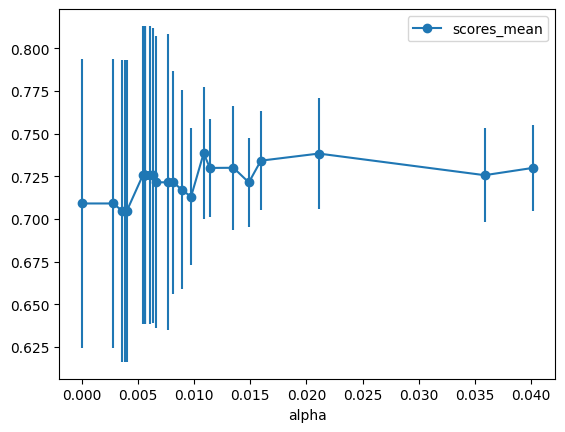

In [57]:

alpha_df = pd.DataFrame(ccp_alpha_values, columns=['alpha','scores_mean','scores_std'])
alpha_df.plot(x='alpha',y='scores_mean', yerr='scores_std',linestyle='-', marker='o')

we were using alpha as 0.016 using 0.012 might be better

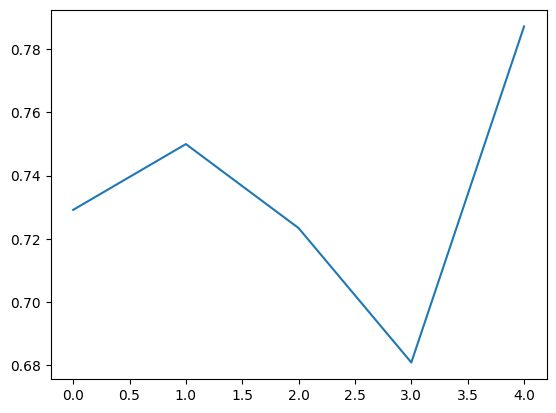

In [60]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.012)
model.fit(x_train,y_train)
scores = cross_val_score(model, x_train, y_train, cv=5)
plt.plot(range(5), scores)

lets check taking a value between 0.014 and 0.015

In [64]:
ideal_ccp_alpha = [x for x in ccp_alphas if (x > 0.014) & (x < 0.015)]
ideal_ccp_alpha

[0.014870358684160256]

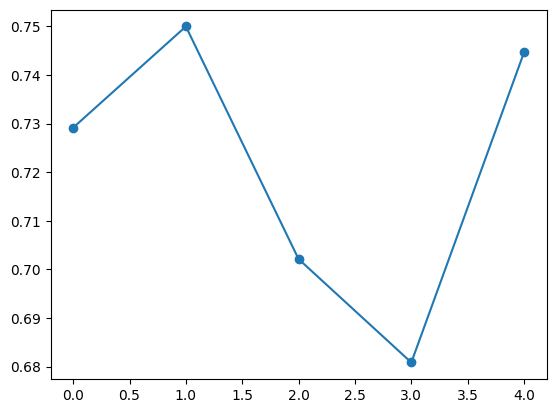

In [66]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.014870358684160256)
model.fit(x_train,y_train)
scores = cross_val_score(model, x_train,y_train, cv=5)
plt.plot(range(5), scores, '-o')

[Text(0.5, 0.875, 'ca <= 0.5\ngini = 0.499\nsamples = 237\nvalue = [124, 113]\nclass = no_HD'),
 Text(0.2, 0.625, 'thal_7.0 <= 0.5\ngini = 0.384\nsamples = 139\nvalue = [103, 36]\nclass = no_HD'),
 Text(0.1, 0.375, 'gini = 0.243\nsamples = 99\nvalue = [85, 14]\nclass = no_HD'),
 Text(0.3, 0.375, 'cp_4.0 <= 0.5\ngini = 0.495\nsamples = 40\nvalue = [18, 22]\nclass = Yes,HD'),
 Text(0.2, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = no_HD'),
 Text(0.4, 0.125, 'gini = 0.32\nsamples = 20\nvalue = [4, 16]\nclass = Yes,HD'),
 Text(0.8, 0.625, 'cp_4.0 <= 0.5\ngini = 0.337\nsamples = 98\nvalue = [21, 77]\nclass = Yes,HD'),
 Text(0.7, 0.375, 'oldpeak <= 0.35\ngini = 0.5\nsamples = 34\nvalue = [17, 17]\nclass = no_HD'),
 Text(0.6, 0.125, 'gini = 0.375\nsamples = 16\nvalue = [12, 4]\nclass = no_HD'),
 Text(0.8, 0.125, 'gini = 0.401\nsamples = 18\nvalue = [5, 13]\nclass = Yes,HD'),
 Text(0.9, 0.375, 'gini = 0.117\nsamples = 64\nvalue = [4, 60]\nclass = Yes,HD')]

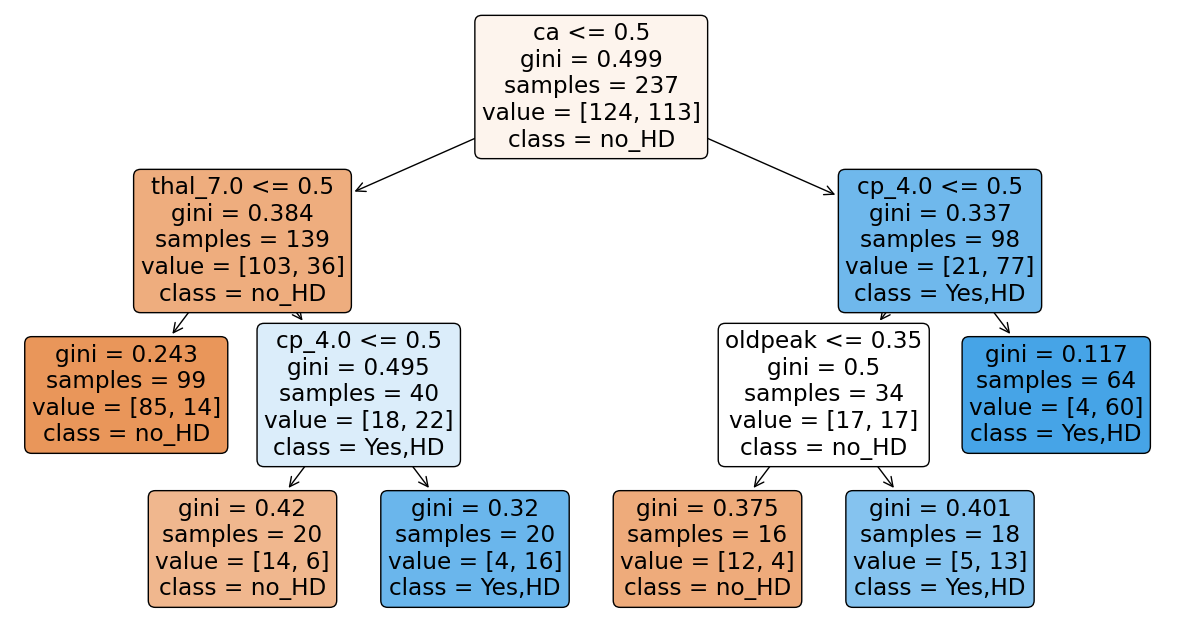

In [71]:
plt.figure(figsize=(15,8))
plot_tree(model,feature_names=x.columns,class_names=['no_HD','Yes,HD'], filled=True,rounded=True)

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


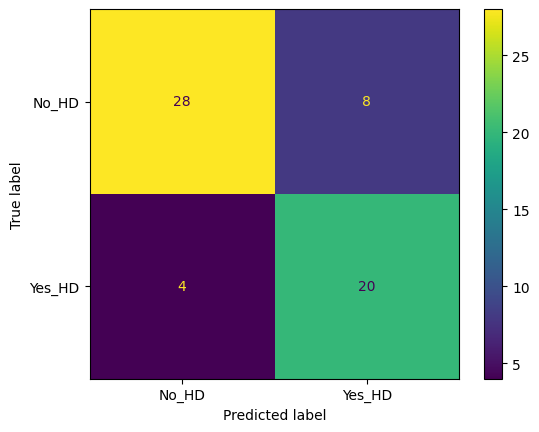

In [70]:
plot_confusion_matrix(model,x_test,y_test, display_labels=['No_HD','Yes_HD'])